In [ ]:
import pandas as pd

url = "https://data.cms.gov/data-api/v1/dataset/5f2c306f-3b1c-42cd-b037-187b2ce22126/data"
snf = pd.read_json(url)

snf.head()


,ENROLLMENT ID,ENROLLMENT STATE,PROVIDER TYPE CODE,PROVIDER TYPE TEXT,NPI,MULTIPLE NPI FLAG,CCN,ASSOCIATE ID,ORGANIZATION NAME,DOING BUSINESS AS NAME,...,ORGANIZATION OTHER TYPE TEXT,PROPRIETARY_NONPROFIT,NURSING HOME PROVIDER NAME,AFFILIATION ENTITY NAME,AFFILIATION ENTITY ID,ADDRESS LINE 1,ADDRESS LINE 2,CITY,STATE,ZIP CODE
0,O20020801000000,NC,00-18,PART A PROVIDER - SKILLED NURSING FACILITY,1346210291,N,345500,6103733167,WINDSOR POINT INC.,WINDSOR POINT INC CCRC,...,,P,WINDSOR POINT CONTINUING CARE,,,1221 BROAD STREET,,FUQUAY-VARINA,NC,275263602
1,O20020805000004,OK,00-18,PART A PROVIDER - SKILLED NURSING FACILITY,1912906694,N,375417,6901713973,N&R OF WESTHAVEN L L C,WESTHAVEN NURSING HOME,...,,P,WESTHAVEN NURSING HOME,,,1215 S. WESTERN,WESTERN NURSING HOME,STILLWATER,OK,740745151
2,O20020814000007,TN,00-18,PART A PROVIDER - SKILLED NURSING FACILITY,1104838606,N,445316,7012824014,"HILLCREST HEALTHCARE, LLC",HILLCREST HEALTHCARE,...,,P,HILLCREST HEALTHCARE CENTER,,,111 PEMBERTON DR,,ASHLAND CITY,TN,370151353
3,O20020814000013,TN,00-18,PART A PROVIDER - SKILLED NURSING FACILITY,1477576346,N,445463,2466369467,BELLS NURSING HOME INC,BELLS NURSING AND REHABILITATION CENTER,...,,P,BELLS NURSING AND REHABILITATION CENTER,,,213 HERNDON DR,,BELLS,TN,380063654
4,O20020816000002,MA,00-18,PART A PROVIDER - SKILLED NURSING FACILITY,1760479851,N,225513,1850208877,BEAUMONT WHITNEY PLACE NORTHBOROUGH,BEAUMONT REHABILITATION & SKILLED NURSING CENT...,...,,P,BEAUMONT REHAB & SKILLED NURSING CTR - NORTHBORO,,,238 W MAIN ST,,NORTHBOROUGH,MA,15321804


In [ ]:
snf.columns

Index(['ENROLLMENT ID', 'ENROLLMENT STATE', 'PROVIDER TYPE CODE',
       'PROVIDER TYPE TEXT', 'NPI', 'MULTIPLE NPI FLAG', 'CCN', 'ASSOCIATE ID',
       'ORGANIZATION NAME', 'DOING BUSINESS AS NAME', 'INCORPORATION DATE',
       'INCORPORATION STATE', 'ORGANIZATION TYPE STRUCTURE',
       'ORGANIZATION OTHER TYPE TEXT', 'PROPRIETARY_NONPROFIT',
       'NURSING HOME PROVIDER NAME', 'AFFILIATION ENTITY NAME',
       'AFFILIATION ENTITY ID', 'ADDRESS LINE 1', 'ADDRESS LINE 2', 'CITY',
       'STATE', 'ZIP CODE'],
      dtype='object')

In [ ]:
snf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ENROLLMENT ID                 1000 non-null   object
 1   ENROLLMENT STATE              1000 non-null   object
 2   PROVIDER TYPE CODE            1000 non-null   object
 3   PROVIDER TYPE TEXT            1000 non-null   object
 4   NPI                           1000 non-null   int64 
 5   MULTIPLE NPI FLAG             1000 non-null   object
 6   CCN                           1000 non-null   object
 7   ASSOCIATE ID                  1000 non-null   int64 
 8   ORGANIZATION NAME             1000 non-null   object
 9   DOING BUSINESS AS NAME        1000 non-null   object
 10  INCORPORATION DATE            1000 non-null   object
 11  INCORPORATION STATE           1000 non-null   object
 12  ORGANIZATION TYPE STRUCTURE   1000 non-null   object
 13  ORGANIZATION OTHER 

In [ ]:
snf.columns = (
    snf.columns
    .str.lower()
    .str.replace(" ", "_")
)

snf.columns


Index(['enrollment_id', 'enrollment_state', 'provider_type_code',
       'provider_type_text', 'npi', 'multiple_npi_flag', 'ccn', 'associate_id',
       'organization_name', 'doing_business_as_name', 'incorporation_date',
       'incorporation_state', 'organization_type_structure',
       'organization_other_type_text', 'proprietary_nonprofit',
       'nursing_home_provider_name', 'affiliation_entity_name',
       'affiliation_entity_id', 'address_line_1', 'address_line_2', 'city',
       'state', 'zip_code'],
      dtype='object')

In [ ]:
state_counts = (
    snf["state"]
    .value_counts()
    .reset_index()
)

state_counts.columns = ["state", "snf_count"]
state_counts.head()


,state,snf_count
0,CA,100
1,OH,68
2,AL,61
3,FL,59
4,IA,54


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "axes.edgecolor": "#ff3333",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "figure.autolayout": True,
    "axes.titleweight": "bold",
    "axes.titlecolor": "white",
    "grid.color": "#444444",
})

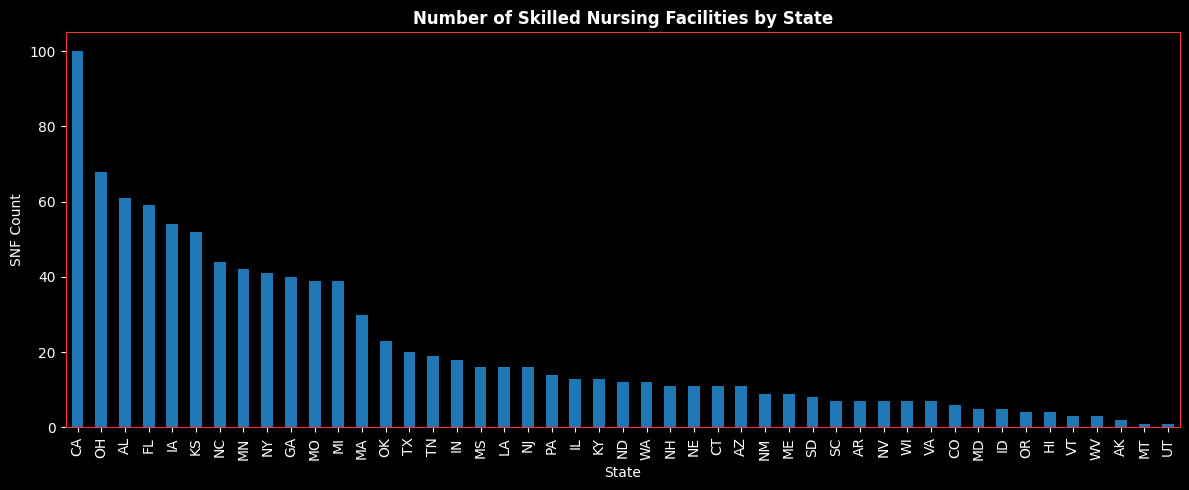

In [ ]:
import matplotlib.pyplot as plt

state_counts.sort_values("snf_count", ascending=False).plot(
    x="state",
    y="snf_count",
    kind="bar",
    figsize=(12,5),
    legend=False
)

plt.title("Number of Skilled Nursing Facilities by State")
plt.xlabel("State")
plt.ylabel("SNF Count")
plt.tight_layout()
plt.show()


In [ ]:
snf["proprietary_nonprofit"].value_counts()


,count
proprietary_nonprofit,
P,649
N,349
D,2


In [ ]:
profit_dist = (
    snf["proprietary_nonprofit"]
    .value_counts(normalize=True)
    .reset_index()
)

profit_dist.columns = ["ownership_type", "percentage"]
profit_dist["percentage"] *= 100
profit_dist


,ownership_type,percentage
0,P,64.9
1,N,34.9
2,D,0.2


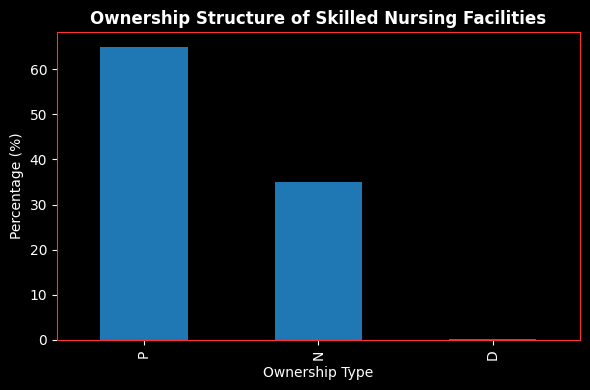

In [ ]:
profit_dist.plot(
    x="ownership_type",
    y="percentage",
    kind="bar",
    figsize=(6,4),
    legend=False
)

plt.title("Ownership Structure of Skilled Nursing Facilities")
plt.xlabel("Ownership Type")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()


In [ ]:
snf["organization_type_structure"].value_counts().head(10)


,count
organization_type_structure,
CORPORATION,491
LLC,420
OTHER,74
PARTNERSHIP,15


In [ ]:
org_struct = (
    snf["organization_type_structure"]
    .value_counts()
    .head(10)
    .reset_index()
)

org_struct.columns = ["structure", "count"]
org_struct


,structure,count
0,CORPORATION,491
1,LLC,420
2,OTHER,74
3,PARTNERSHIP,15


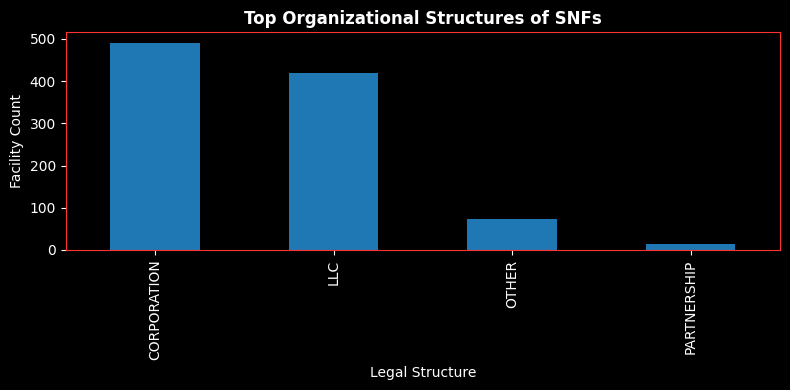

In [ ]:
org_struct.plot(
    x="structure",
    y="count",
    kind="bar",
    figsize=(8,4),
    legend=False
)

plt.title("Top Organizational Structures of SNFs")
plt.xlabel("Legal Structure")
plt.ylabel("Facility Count")
plt.tight_layout()
plt.show()


In [ ]:
owner_counts = (
    snf.groupby("affiliation_entity_id")
       .size()
       .sort_values(ascending=False)
)

owner_counts.head(20)


,0
affiliation_entity_id,
,392
311,35
810,23
109,19
144,19
237,19
482,19
372,18
507,18


In [ ]:
snf.merge(owner_counts.rename("facility_count"),
          left_on="affiliation_entity_id",
          right_index=True
).groupby("organization_type_structure")["facility_count"].mean()


,facility_count
organization_type_structure,
CORPORATION,230.012220
LLC,62.092857
OTHER,269.067568
PARTNERSHIP,95.600000


In [ ]:
# Facilities controlled per affiliation entity
entity_counts = (
    snf.groupby("affiliation_entity_id")
       .size()
       .reset_index(name="facility_count")
       .sort_values("facility_count", ascending=False)
)

entity_counts.head(10)


,affiliation_entity_id,facility_count
0,,392
50,311,35
149,810,23
3,109,19
14,144,19
37,237,19
91,482,19
66,372,18
99,507,18
143,771,17


In [ ]:
# Cumulative share of facilities controlled
entity_counts["cumulative_share"] = (
    entity_counts["facility_count"].cumsum() /
    entity_counts["facility_count"].sum()
)

entity_counts.head(10)


,affiliation_entity_id,facility_count,cumulative_share
0,,392,0.392
50,311,35,0.427
149,810,23,0.450
3,109,19,0.469
14,144,19,0.488
37,237,19,0.507
91,482,19,0.526
66,372,18,0.544
99,507,18,0.562
143,771,17,0.579


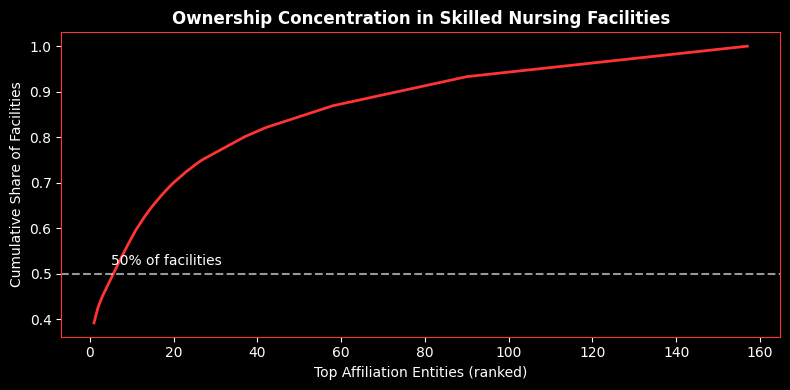

In [ ]:
# Plot cumulative ownership concentration
plt.figure(figsize=(8,4))
plt.plot(
    range(1, len(entity_counts)+1),
    entity_counts["cumulative_share"],
    color="#ff3333",
    linewidth=2
)

plt.axhline(0.5, linestyle="--", color="white", alpha=0.6)
plt.text(5, 0.52, "50% of facilities", color="white")

plt.xlabel("Top Affiliation Entities (ranked)")
plt.ylabel("Cumulative Share of Facilities")
plt.title("Ownership Concentration in Skilled Nursing Facilities")

plt.show()
